In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import os


In [ ]:
# Helper functions

def Sort_by_keys(data, keys):
    """Returns data sorted by keys, normed to probabilities as a numpy array."""
    vals = [data.get(k, 0) for k in keys] 
    vals_normed = convert_to_probabilities(vals)
    return np.array(vals_normed)

def load_from_json(filename):
    with open(filename, 'r') as json_file:
        data = json.load(json_file)
    return [tuple(i) for i in data]

def convert_to_probabilities(measurements):
    """convert list of total measurements into list of probabilities."""
    total_count = reduce(lambda x,y : int(x) + int(y) , measurements)
    return [round(x / total_count, 4) for x in measurements]

def hellinger_distance(P, Q): 
    return np.linalg.norm(np.sqrt(P) - np.sqrt(Q)) / np.sqrt(2)

def fidelity(P, Q): 
    return np.sum(np.sqrt(Q * P))**2


    

### Plot distributions as bar plot
---

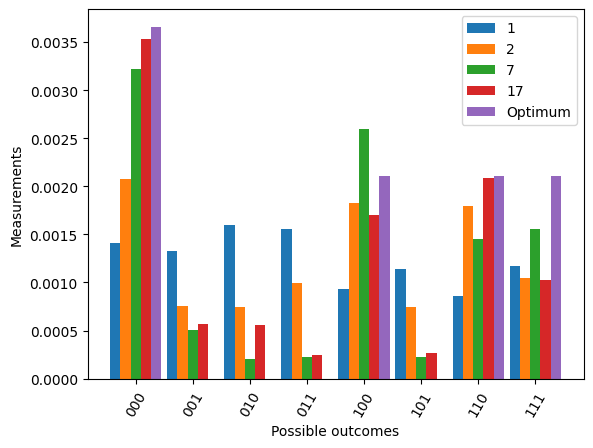

In [5]:
#load data and select results to display
loadpath = "Experiment_data/First_experiment.json"
labels = "trotter"
wantedEntries = [0,1,6,16,20] #Include last entry for optimum
bar_width = 0.18

#Sort distributions
dataDist = load_from_json(loadpath)
keys = sorted(dataDist[0][1].keys())
data = []
for i in wantedEntries:
    vals = dataDist[i][1]
    data.append([vals.get(k, 0)/100000 for k in keys])

#Plot
index = np.arange(len(keys))
fig, ax = plt.subplots()
for i, value_set in enumerate(data):
    offset = (i - (len(data) - 1) / 2) * bar_width  # Calculate position offset
    if (value_set is not data[-1]):
        ax.bar(index + offset, value_set, bar_width, label=dataDist[wantedEntries[i]][0][labels])
    else: #Show the optimal, saved in last entry
        ax.bar(index + offset, value_set, bar_width, label="Optimum")
ax.set_xlabel('Possible outcomes')
ax.set_ylabel('Measurements')
ax.set_xticks(index)
ax.set_xticklabels(keys)
plt.xticks(rotation=60) 
ax.legend()
plt.show()

### Plot distance to optimum for different Trotter values and metrics
---

{'XXX': 5.0, 'XXY': 5.0, 'XXZ': 5.0, 'XYI': 5.0, 'XZI': 5.0, 'YII': 5.0, 'ZII': 5.0}
lowest 1-norm: 4
lowest 2-norm: 4
lowest Sup-norm: 11
lowest Hellinger-norm: 7


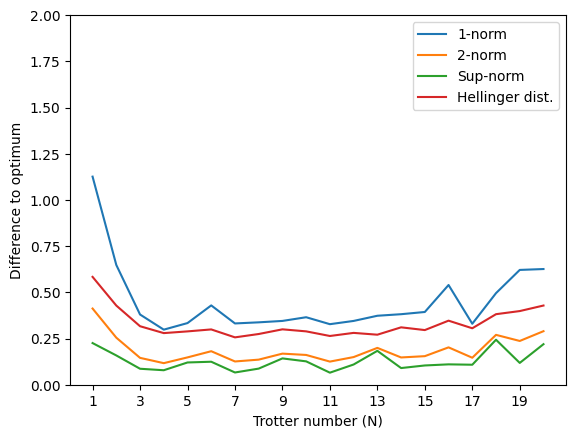

In [7]:
def plot(data_input,save_to = None, yscalaFrom = 0.0, yscalaTo = 2.0):
    #Sort and norm
    keys = sorted(data_input[0][1].keys())
    data = [Sort_by_keys(i[1],keys) for i in data_input]
    optimum = data.pop()

    #get all Norms
    Norm1 = [np.linalg.norm(optimum - entry,1) for entry in data]
    Norm2 = [np.linalg.norm(optimum - entry,2) for entry in data]
    NormSup = [np.linalg.norm(optimum - entry, np.inf) for entry in data]
    NormHellinger = [hellinger_distance(optimum, entry) for entry in data] 

    print("lowest 1-norm: "+str(np.argmin(Norm1)+1))
    print("lowest 2-norm: "+str(np.argmin(Norm2)+1))
    print("lowest Sup-norm: "+str(np.argmin(NormSup)+1))
    print("lowest Hellinger-norm: "+str(np.argmin(NormHellinger)+1))

    # Plot each set of values
    x = np.arange(1,len(data)+1) 
    plt.plot(x, Norm1, label='1-norm')
    plt.plot(x, Norm2, label='2-norm')
    plt.plot(x, NormSup, label='Sup-norm')
    plt.plot(x, NormHellinger, label='Hellinger dist.')

    # Add labels and title
    plt.xlabel('Trotter number (N)')
    plt.ylabel('Difference to optimum')

    # Plot
    plt.xticks(np.arange(1, len(data)+1, 2))
    plt.ylim(yscalaFrom, yscalaTo)
    plt.legend()
    if (save_to == None):
        plt.show()
    else:
        plt.savefig(save_to)
        plt.close()

data = load_from_json("Experiment_data/First_experiment.json") 
print(data[-1][0]['Pauli'])
plot(data)
